## Inicialização do código, libs necessarias

In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from minisom import MiniSom

from utils import progress
%matplotlib inline

## Funções auxiliares

In [2]:
def clean_dataset(filename):
    dataset = pd.read_csv(filename, usecols=range(1, 7), parse_dates=[0])
    dataset['date'] = dataset['date'].apply(lambda x: float(x.value))
    return np.apply_along_axis(lambda x: x / np.linalg.norm(x), 1, dataset)

def get_labels(filename):
    return np.genfromtxt(filename, delimiter=',', usecols=(7,), dtype=int, skip_header=True)

def calc_precision(dataset_filename):
    label_map = np.zeros(shape=(DIM_X, DIM_Y))
    label_map *= -1

    for i, d in enumerate(data):
        x, y = som.winner(d)
        l = labels[i]
        label_map[x][y] = l

    data_test = clean_dataset(dataset_filename)
    labels_test = get_labels(dataset_filename)

    hit_1 = 0
    hit_0 = 0
    total = len(data_test)

    for i, t in enumerate(zip(data_test, labels_test)):
        d, l = t
        x, y = som.winner(d)

        if l == 1 and l == label_map[x][y]:
            hit_1 += 1
        elif l == 0 and l == label_map[x][y]:
            hit_0 += 1

        progress(i, total, 'Neuron {} -> {}'.format((x, y), l))

    precision_1 = round((hit_1 * 100) / total, 4)
    precision_0 = round((hit_0 * 100) / total, 4)
    error_1 = 100.0 - precision_1
    error_0 = 100.0 - precision_0
    print('')

    print('Taxa de acerto da classe 1 \t-> {}%'.format(precision_1))
    print('Taxa de acerto da classe 0 \t-> {}%'.format(precision_0))
    print('Total: {}%'.format(precision_1+precision_0))

    print('')
    print('Taxa de erro da classe 1 \t-> {}%'.format(error_1))
    print('Taxa de erro da classe 0 \t-> {}%'.format(error_0))

## Leitura dos dados (treinamento)

In [22]:
datasetfull_filename = 'data/dataset_full.txt'
datatest_filename = 'data/datatest.txt'
datatest2_filename = 'data/datatest2.txt'
datatraining_filename = 'data/datatraining.txt'
DIM_X, DIM_Y = 12, 12
ITERATION = 20

data = clean_dataset(datatraining_filename)
labels = get_labels(datatraining_filename)

som = MiniSom(DIM_X, DIM_Y, 6, sigma=1.0, learning_rate=0.3)
som.random_weights_init(data)  # inicia com pesos aleatorios

# som.train_random(data, 2000)
print('Treinando...', end='')
som.train_batch(data, num_iteration=ITERATION)
print('...Feito!')

Treinando......Feito!


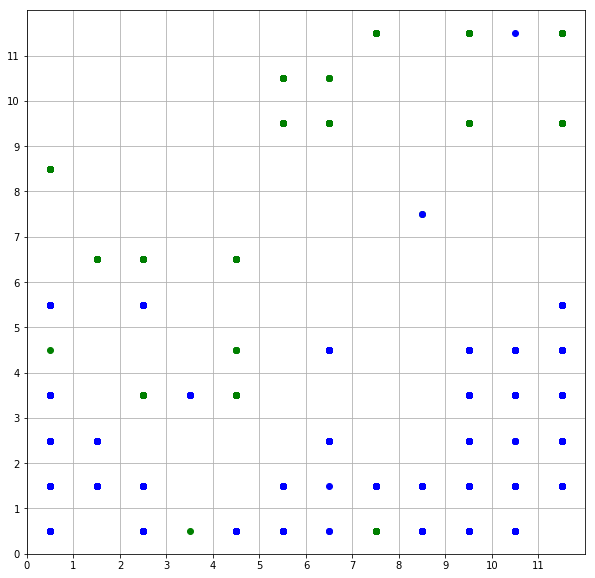

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.set_xticks(np.arange(0, DIM_X, 1))
ax.set_yticks(np.arange(0, DIM_Y, 1))

labels = get_labels(datatest_filename)
data2 = clean_dataset(datatest_filename)

colors = ['b', 'g']
# azul = 0
# verde = 1
# none = neuronios nao excitados
for d, t in zip(data2, labels):
    w = som.winner(d)
    x, y = w
    plt.scatter(x+0.5, y+0.5, color=colors[t])

plt.axis([0, DIM_X, 0, DIM_Y])
plt.grid()
plt.show()